In [2]:

import sys
!{sys.executable} -m pip install numpy


  Using cached https://files.pythonhosted.org/packages/9b/af/4fc72f9d38e43b092e91e5b8cb9956d25b2e3ff8c75aed95df5569e4734e/numpy-1.17.4-cp37-cp37m-manylinux1_x86_64.whl


In [3]:
!{sys.executable} -m pip install matplotlib

  Using cached https://files.pythonhosted.org/packages/61/42/3e92d7aa64295483fbca20a86c89b34d0cb43cffaadaffe028793902d790/matplotlib-3.1.2-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/93/f8/518fb0bb89860eea6ff1b96483fbd9236d5ee991485d0f3eceff1770f654/kiwisolver-1.1.0-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c0/0c/fc2e007d9a992d997f04a80125b0f183da7fb554f1de701bbb70a8e7d479/pyparsing-2.4.5-py2.py3-none-any.whl


In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np
from numpy import average
from re import findall
from math import ceil, floor

In [37]:
%run /home/jovyan/L50_Project/L50/Jupyter/useful/useful1.py

### Experiment 1
Ping 500 times. Plot the CDF of RTTs.

#### vm1 

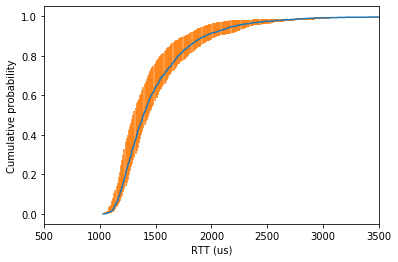

In [33]:
graph1('1/10.0.0.6/exp1',2,10.0,500)

#### vm0

In [ ]:
graph1('1/10.0.0.5/exp1',2,10.0,500)

#### vm3

In [ ]:
graph1('1/10.0.0.7/exp1',2,10.0,500)

#### vm4

In [ ]:
graph1('1/10.0.0.4/exp1',2,10.0,500)

#### Experiment 2
Ping 1000 times to other vms. Plot the CDF of RTTs.

#### vm1

In [ ]:
graph1('2/10.0.0.6/exp2',2,10.0,1000)

#### vm0

In [ ]:
graph1('2/10.0.0.5/exp2',2,10.0,1000)

#### vm2

In [ ]:
graph1('2/10.0.0.7/exp2',2,10.0,1000)

#### vm4

In [ ]:
graph1('2/10.0.0.4/exp2',2,10.0,1000)

#### Experiment 3
Ping 500 times with varying intervals. Plot the CDFs of RTTs.

#### vm1

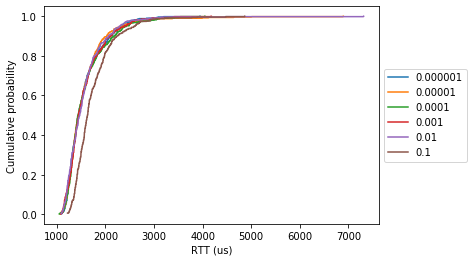

In [38]:
interval=['0.000001', '0.00001', '0.0001','0.001','0.01','0.1']
def graph2(exp,interval,num):
    for i in interval:
        rtt= getrtt('3/10.0.0.6/'+exp+'_'+i,2,num)
        values, base = np.histogram(rtt, bins=1000)
        cumulative = np.cumsum(values/float(num))
        plt.plot(base[:-1], cumulative, label=i)
    plt.ylabel("Cumulative probability")
    plt.xlabel("RTT (us)")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()
graph2('exp2',interval,500)

#### vm0

In [ ]:
interval=['0.000001', '0.00001', '0.0001','0.001','0.01','0.1']
def graph2(exp,interval,num):
    for i in interval:
        rtt= getrtt('3/10.0.0.5/'+exp+'_'+i,2,num)
        values, base = np.histogram(rtt, bins=1000)
        cumulative = np.cumsum(values/float(num))
        plt.plot(base[:-1], cumulative, label=i)
    plt.ylabel("Cumulative probability")
    plt.xlabel("RTT (us)")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()
graph2('exp2',interval,500)

#### vm2

In [ ]:
interval=['0.000001', '0.00001', '0.0001','0.001','0.01','0.1']
def graph2(exp,interval,num):
    for i in interval:
        rtt= getrtt('3/10.0.0.7/'+exp+'_'+i,2,num)
        values, base = np.histogram(rtt, bins=1000)
        cumulative = np.cumsum(values/float(num))
        plt.plot(base[:-1], cumulative, label=i)
    plt.ylabel("Cumulative probability")
    plt.xlabel("RTT (us)")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()
graph2('exp2',interval,500)

#### vm4

In [ ]:
interval=['0.000001', '0.00001', '0.0001','0.001','0.01','0.1']
def graph2(exp,interval,num):
    for i in interval:
        rtt= getrtt('3/10.0.0.4/'+exp+'_'+i,2,num)
        values, base = np.histogram(rtt, bins=1000)
        cumulative = np.cumsum(values/float(num))
        plt.plot(base[:-1], cumulative, label=i)
    plt.ylabel("Cumulative probability")
    plt.xlabel("RTT (us)")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()
graph2('exp2',interval,500)

### Experiment 3
Ping 10000 times using flooding.

#### vm1

<font color='red'>TODO:</font> Fill in `ping_cmd`, the command to ping from Machine A to Machine B 10000 times using flooding.

In [20]:
ping_cmd = 'ping 192.168.0.2 -c 10000 -i 0'
print local_cmd(ping_cmd + ' | grep -e "transmitted" -e "rtt"')

10000 packets transmitted, 10000 received, 0% packet loss, time 318ms
rtt min/avg/max/mdev = 0.018/0.021/0.161/0.005 ms, ipg/ewma 0.031/0.021 ms



#### 3b B ping A

<font color='red'>TODO:</font> Fill in `ping_cmd`, the command to ping from Machine B to Machine A 10000 times using flooding.

In [21]:
ssh = ssh_connect(machB_ip)
ping_cmd = 'ping 192.168.0.1 -c 10000 -i 0'
print ssh_cmd(ping_cmd+' | grep -e "transmitted" -e "rtt"', ssh)
ssh.close()

10000 packets transmitted, 10000 received, 0% packet loss, time 299ms
rtt min/avg/max/mdev = 0.018/0.020/0.136/0.008 ms, ipg/ewma 0.029/0.020 ms



### Experiment 4
Ping 10000 times using flooding, pinning to core 2.

taskset can be used to launch a command with a given CPU affinity. This means that the process will only run on the list of specified CPU cores.
###### Usage: 
`taskset -c <list of CPU cores> command [arguments]`    

#### A ping B

<font color='red'>TODO:</font> Fill in `cmd`, the command to ping from Machine A to Machine B 10000 times using flooding, pinning to core 2.

In [23]:
cmd = 'taskset -c 2 ping 192.168.0.2 -c 10000 -i 0'
print local_cmd(cmd+' | grep -e "transmitted" -e "rtt"')

10000 packets transmitted, 10000 received, 0% packet loss, time 296ms
rtt min/avg/max/mdev = 0.018/0.020/0.156/0.007 ms, ipg/ewma 0.029/0.022 ms



#### B ping A

<font color='red'>TODO:</font> Fill in `cmd`, the command to ping from Machine B to Machine A 10000 times using flooding, pinning to core 2.